In [19]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import itertools
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from scipy import stats
pd.set_option('display.max_rows', 200)

In [20]:
programs = range(1,101)
results = ['results/results.csv']

In [21]:
# Read all csv results into a data frame
def read_result(files):
    dfs = []
    for file in files:
        df = pd.read_csv(file, sep=",")
        df = df.rename(columns={"mean":"Mean"})
        df = df.rename(columns={"parameter":"parameter_seed"})
        dfs.append(df)
        
    return pd.concat(dfs)   

In [22]:
mainDF = read_result(results)
mainDF

,command,Mean,stddev,median,user,system,min,max,parameter_seed
0,./map-1-1.native,1.574837,0.003614,1.575437,1.574331,0.000636,1.566552,1.580152,1
1,./map-2-1.native,1.572685,0.004422,1.574520,1.570581,0.002142,1.564216,1.577931,1
2,./map-1-2.native,12.855473,0.023866,12.860667,12.853272,0.001763,12.815647,12.887641,2
3,./map-2-2.native,12.866314,0.013595,12.863716,12.864285,0.001627,12.847889,12.896635,2
4,./map-1-3.native,3.311257,0.008636,3.312440,3.310432,0.000815,3.296868,3.321875,3
5,./map-2-3.native,2.733380,0.011793,2.737081,2.732057,0.001244,2.713442,2.751491,3
6,./map-1-4.native,2.526421,0.013994,2.527757,2.524921,0.001525,2.506838,2.555040,4
7,./map-2-4.native,2.592090,0.013479,2.590145,2.589602,0.002437,2.568172,2.614980,4
8,./map-1-5.native,8.412998,0.008879,8.413644,8.410674,0.002067,8.393486,8.422476,5
9,./map-2-5.native,8.415371,0.008751,8.414615,8.411834,0.003210,8.402335,8.427289,5


In [23]:
def compute_rel(df):
    data = []
    for p in programs:
        cells = df[(df.parameter_seed == p)]
        v1 = cells[(cells.command) == './map-1-{}.native'.format(p)]
        v2 = cells[(cells.command) == './map-2-{}.native'.format(p)]
        rel = v1.Mean.mean() / v2.Mean.mean()
        tot = v1.Mean.mean() + v2.Mean.mean()
        data.append({'Program': p, "Relative": rel, "Tot": tot})
    return pd.DataFrame(data)
df = compute_rel(mainDF)
#df.sort_values(by=['Tot','Relative'])
df

,Program,Relative,Tot
0,1,1.001368,3.147523
1,2,0.999157,25.721786
2,3,1.211415,6.044637
3,4,0.974666,5.118511
4,5,0.999718,16.828368
5,6,0.824787,19.178820
6,7,0.998776,8.759291
7,8,1.024039,4.938391
8,9,0.975933,9.668570
9,10,1.022661,12.912696


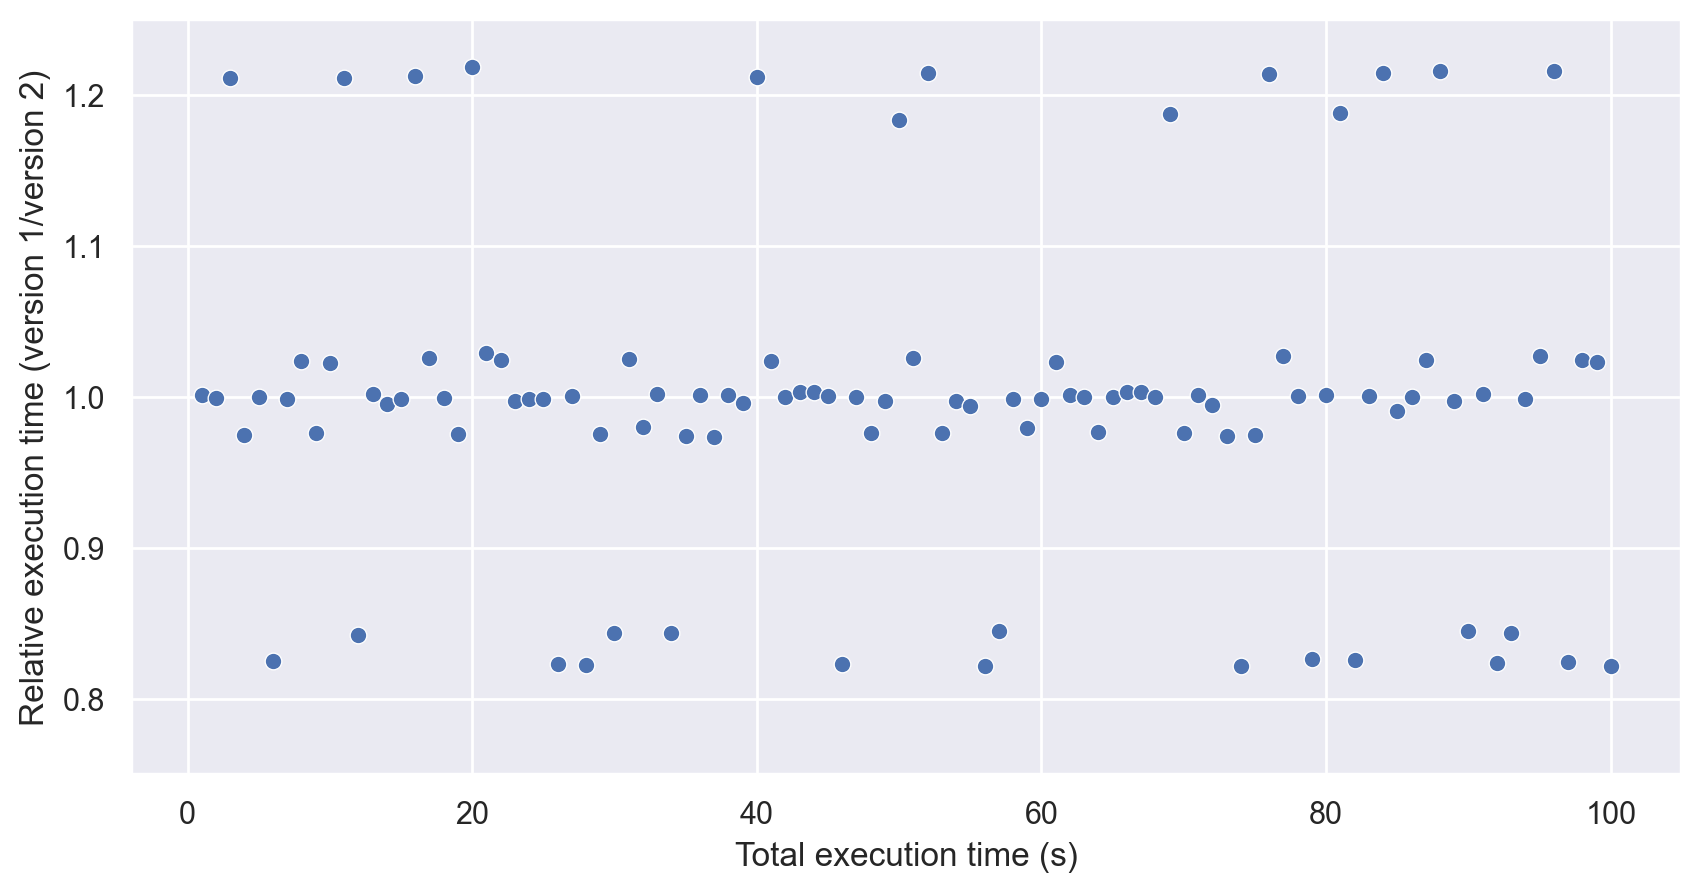

In [24]:
def my_plot(df):
    df = compute_rel(df)
    plt.xlabel("Total execution time (s)")
    plt.ylabel("Relative execution time (version 1/version 2)")
    plt.ylim(0.75, 1.25)
    sns.scatterplot(data=df, x='Program', y='Relative')
my_plot(mainDF)